# Classification Models

# Libraries and functions

In [164]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# Understand Dataset and Problem: Diabetes Prediction

We would like to predict if a person has some test results has diabetes or not.  
We have some independent variables:  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

Dependent variable : Outcome (1 : patient has diabetes,  0 : patient has no diabetes)

We will predict Outcome variable by using multiple classification models such as:

        Logistic Regression, 
        KNN, 
        SVM, 
        Artificial Neural Networks, 
        Decision Tree, 
        Random Forest, 
        Gradient Boosting, 
        XGBoost, 
        Light GBM,
        CatBoost.
        
We will use Cross validation for each model to get better predictions.
Then we will compare RMSE values to decide which algorith works better.

In [166]:
df = pd.read_csv("./diabetes.csv")

In [167]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Logistic Regression

# Model & Prediction

In [168]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [170]:
y = df["Outcome"] # dependent variable
X = df.drop(["Outcome"], axis = 1) # independent variables

In [171]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [172]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [173]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [174]:
loj_model.intercept_

array([-5.89159518])

In [175]:
loj_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [176]:
#prediction
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [177]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [178]:
y_pred = loj_model.predict(X)

In [179]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [180]:
accuracy_score(y, y_pred)

0.7747395833333334

In [181]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# ROC CUrve

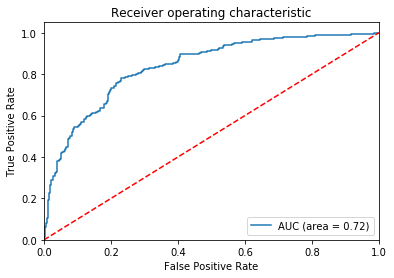

In [182]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model Tuning

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [184]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [185]:
y_pred = loj_model.predict(X_test)

In [186]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [187]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

# K-Nearest Neighbor (KNN)

In [188]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [189]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Prediction

In [190]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [191]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [192]:
y_pred = knn_model.predict(X_test)

In [193]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [195]:
knn = KNeighborsClassifier()

In [196]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [197]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [198]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [199]:
knn_cv_model.best_score_

0.748637316561845

In [200]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [201]:
#final model

In [202]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [203]:
y_pred = knn_tuned.predict(X_test)

In [204]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [205]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

# Support Vector Machines (SVM)

In [206]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Prediction

In [208]:
#linear SVM
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [209]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
y_pred = svm_model.predict(X_test)

In [211]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [212]:
svm = SVC()

In [213]:
#kernel and rbf SVM
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]} # rbf = nonlinear SVM (radian basis function)

In [214]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.7min finished


In [215]:
# We created 2 different models. One is with linear SVM, other one is with radial SVM. We will compare the performance of these two in the next line.

In [216]:
svm_cv_model.best_score_

0.7839044652128765

In [217]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [218]:
# As we see above best performance is provided by linear SVM at this problem.
# Now, we will CV this model,

In [219]:
#final model (cross validated)

In [220]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [221]:
y_pred = svm_tuned.predict(X_test)

In [222]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Artificial Neural Networks

In [223]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)




In [225]:
# SVM algorithm works better with standardized (homogenious) datasets. So we will scale it.

In [360]:
scaler = StandardScaler()

In [361]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [362]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Model & Prediction

In [363]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

C:\Users\senih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [230]:
mlpc_model.coefs_

[array([[ 1.52626430e-01, -4.13489682e-03,  1.95379096e-02,
         -2.15351037e-01,  1.30472451e-01, -1.45984306e-01,
          1.41972027e-01,  4.94198572e-02, -2.07972890e-01,
          2.71302050e-01,  1.79714644e-01, -1.99393974e-01,
         -2.23357987e-01,  4.82215799e-02, -3.40183044e-01,
          2.63261393e-01, -2.22320046e-01, -1.76830869e-01,
         -1.71401084e-01, -1.26919387e-01,  8.60535320e-02,
          8.72576106e-02,  3.36239907e-03,  5.82145662e-02,
         -3.62224777e-01,  3.63632582e-02,  1.12041749e-01,
         -3.34932090e-01,  1.32864758e-01, -2.38955660e-01,
          3.13221099e-01, -2.36116468e-01,  2.24689365e-01,
         -2.57649167e-01, -1.68579905e-02, -3.82024796e-02,
         -2.62173745e-01, -1.05870314e-02,  5.84654150e-02,
         -2.71638955e-01,  1.88013334e-01, -2.97388314e-02,
         -2.96551662e-01, -1.54265569e-01, -1.25424323e-01,
          2.12918235e-01, -1.17175770e-01, -1.61243940e-01,
         -4.85206342e-02,  8.13864265e-0

In [231]:
?mlpc_model # relu for regression, logistics for classification peroblems

Object `mlpc_model # relu for regression, logistics for classification peroblems` not found.


In [364]:
y_pred = mlpc_model.predict(X_test)

In [365]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# Model Tuning

In [366]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]} #2 layer with (10,10) 

In [367]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic") # lbfgs works better with small datasets. Otherwise use 'adam'

In [368]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  1.0min finished
C:\Users\senih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [345]:
mlpc_cv_model

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [369]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (100, 100)}

In [239]:
#finalmodel

In [371]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 1, hidden_layer_sizes = (100,100)).fit(X_train, y_train)

C:\Users\senih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [372]:
y_pred = mlpc_tuned.predict(X_test)

In [373]:
accuracy_score(y_test, y_pred)

0.7575757575757576

# CART (Classification and Regression Tree)

In [243]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Prediction

In [245]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [246]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [247]:
y_pred = cart_model.predict(X_test)

In [248]:
accuracy_score(y_test, y_pred)

0.7012987012987013

# Model Tuning

In [249]:
cart = DecisionTreeClassifier()

In [250]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [251]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished


In [252]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [253]:
#final model =  use {'max_depth': 5, 'min_samples_split': 20}

In [254]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20).fit(X_train, y_train)

In [255]:
y_pred = cart_tuned.predict(X_test)

In [256]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [257]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Prediction

In [259]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [260]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [261]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [262]:
rf = RandomForestClassifier()

In [263]:
X_train.shape # we have 8 different features. we need it below to decide max feature number.

(537, 8)

In [264]:
rf_params = {"n_estimators": [100,200,500,1000], # number of total trees
            "max_features": [3,5,7,8], 
            "min_samples_split": [2,5,10,20]} # 

In [265]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 24.8min finished


In [266]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 200}

In [267]:
#final model

In [268]:
rf_tuned = RandomForestClassifier(max_features = 8, 
                                  min_samples_split = 5, 
                                  n_estimators = 500).fit(X_train, y_train)

In [269]:
y_pred = rf_tuned.predict(X_test)

In [270]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Importance of variables / Feature selection

In [271]:
rf_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

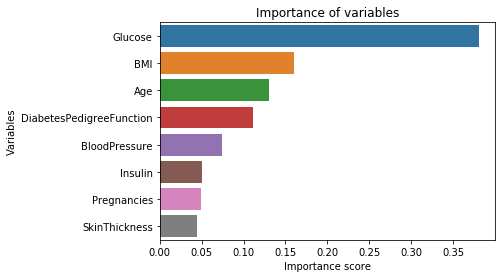

In [272]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance score')
plt.ylabel('Variables')
plt.title("Importance of variables")
plt.show()

# Gradient Boosting Machines

# Model & Prediction

In [273]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [274]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        c:\users\senih\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    

In [275]:
y_pred = gbm_model.predict(X_test)

In [276]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# Model Tuning

In [277]:
gbm = GradientBoostingClassifier()

In [278]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}

In [279]:
gbm_cv_model= GridSearchCV(gbm, gbm_params, 
                           cv = 10, 
                           n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.1min finished


In [280]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [281]:
#final model

In [282]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                       max_depth = 5, 
                                       n_estimators = 500).fit(X_train, y_train)

In [283]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

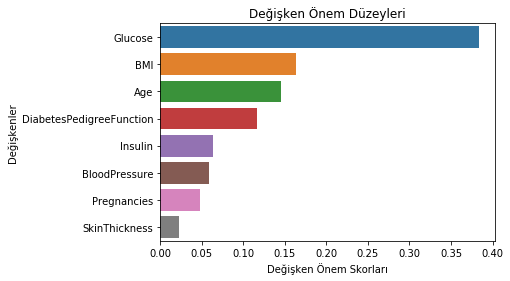

In [284]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# XGBoost

# Model & Prediction

In [285]:
!pip install xgboost

In [286]:
from xgboost import XGBClassifier

In [287]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [288]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
           colsample_bynode=1 <...> weight=1, subsample=1, tree_method=None,
           validate_parameters=False, verbosity=None)
File:        c:\users\senih\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If thi

In [289]:
y_pred = xgb_model.predict(X_test)

In [290]:
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [291]:
xgb = XGBClassifier()

In [292]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [293]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.8min finished


In [294]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [295]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.001, 
                                max_depth= 7, 
                                n_estimators= 500, 
                                subsample= 0.6).fit(X_train, y_train)

In [296]:
y_pred = xgb_tuned.predict(X_test)

In [297]:
accuracy_score(y_test,y_pred)

0.7575757575757576

In [298]:
# Feature importance

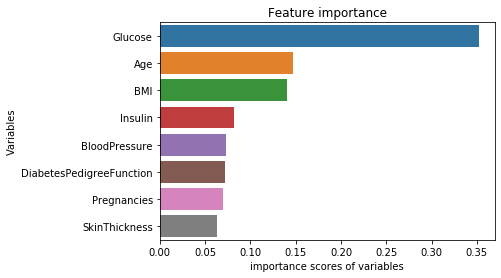

In [299]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('importance scores of variables')
plt.ylabel('Variables')
plt.title("Feature importance")
plt.show()

# Light GBM  (faster than XGBoost) developed by Microsoft

# Model & Prediction

In [300]:
!pip install lightgbm

In [301]:
!conda install -c conda-forge lightgbm

Solving environment: ...working... done

# All requested packages already installed.



In [302]:
from lightgbm import LGBMClassifier

In [303]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [304]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           c:\users\senih\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/a

In [305]:
y_pred = lgbm_model.predict(X_test)

In [306]:
accuracy_score(y_test,y_pred)

0.7272727272727273

# Model Tuning

In [307]:
lgbm = LGBMClassifier()

In [308]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}

In [309]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:    8.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.1s finished


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [310]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [311]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.01, 
                            max_depth= 1, 
                            n_estimators= 500).fit(X_train, y_train)

In [312]:
y_pred = lgbm_tuned.predict(X_test)

In [313]:
accuracy_score(y_test, y_pred)

0.7575757575757576

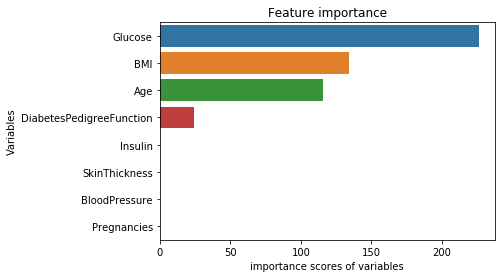

In [314]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('importance scores of variables')
plt.ylabel('Variables')
plt.title("Feature importance")
plt.show()

# CatBoost  (developed by Yandex)

# Model & Prediction

In [315]:
!pip install catboost

In [316]:
from catboost import CatBoostClassifier

In [317]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [318]:
?catb_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x00000273BC8A94C8>
File:            c:\users\senih\anaconda3\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [319]:
y_pred = catb_model.predict(X_test)

In [320]:
accuracy_score(y_test, y_pred)

0.7402597402597403

# Model Tuning

In [321]:
catb = CatBoostClassifier()

In [322]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}

In [323]:
catb_cv_model = GridSearchCV(catb, catb_params, 
                             cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.5min finished


0:	learn: 0.6730562	total: 14.5ms	remaining: 2.88s
1:	learn: 0.6583303	total: 17.5ms	remaining: 1.73s
2:	learn: 0.6413852	total: 20.7ms	remaining: 1.36s
3:	learn: 0.6268405	total: 24ms	remaining: 1.18s
4:	learn: 0.6150883	total: 27.3ms	remaining: 1.06s
5:	learn: 0.5989093	total: 30.3ms	remaining: 979ms
6:	learn: 0.5861303	total: 33.4ms	remaining: 921ms
7:	learn: 0.5735117	total: 36.6ms	remaining: 878ms
8:	learn: 0.5616370	total: 39.8ms	remaining: 845ms
9:	learn: 0.5507706	total: 43.3ms	remaining: 822ms
10:	learn: 0.5388394	total: 46.5ms	remaining: 799ms
11:	learn: 0.5264516	total: 49.8ms	remaining: 780ms
12:	learn: 0.5191660	total: 53ms	remaining: 763ms
13:	learn: 0.5104459	total: 56.2ms	remaining: 747ms
14:	learn: 0.5017018	total: 59.2ms	remaining: 730ms
15:	learn: 0.4954928	total: 62.2ms	remaining: 715ms
16:	learn: 0.4896817	total: 65.3ms	remaining: 703ms
17:	learn: 0.4808546	total: 71.2ms	remaining: 720ms
18:	learn: 0.4724010	total: 77.1ms	remaining: 734ms
19:	learn: 0.4657244	total

In [324]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

In [325]:
catb_tuned = CatBoostClassifier(depth= 8, 
                                iterations= 200, # number of trees
                                learning_rate= 0.03).fit(X_train, y_train)

0:	learn: 0.6730562	total: 4.81ms	remaining: 957ms
1:	learn: 0.6583303	total: 9.04ms	remaining: 896ms
2:	learn: 0.6413852	total: 12.5ms	remaining: 822ms
3:	learn: 0.6268405	total: 15.8ms	remaining: 772ms
4:	learn: 0.6150883	total: 19.7ms	remaining: 768ms
5:	learn: 0.5989093	total: 23.8ms	remaining: 769ms
6:	learn: 0.5861303	total: 27.3ms	remaining: 754ms
7:	learn: 0.5735117	total: 30.5ms	remaining: 731ms
8:	learn: 0.5616370	total: 34.5ms	remaining: 732ms
9:	learn: 0.5507706	total: 38.5ms	remaining: 732ms
10:	learn: 0.5388394	total: 42ms	remaining: 721ms
11:	learn: 0.5264516	total: 45.6ms	remaining: 715ms
12:	learn: 0.5191660	total: 48.9ms	remaining: 704ms
13:	learn: 0.5104459	total: 52.2ms	remaining: 694ms
14:	learn: 0.5017018	total: 55.5ms	remaining: 684ms
15:	learn: 0.4954928	total: 58.5ms	remaining: 673ms
16:	learn: 0.4896817	total: 61.6ms	remaining: 663ms
17:	learn: 0.4808546	total: 64.6ms	remaining: 653ms
18:	learn: 0.4724010	total: 67.9ms	remaining: 647ms
19:	learn: 0.4657244	tot

In [326]:
y_pred = catb_tuned.predict(X_test)

In [327]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [1]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance scores of variables')
plt.ylabel('Variables')
plt.title("Importance of variables")
plt.show()

NameError: name 'pd' is not defined

# Compare all tuned models

In [375]:
models = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)

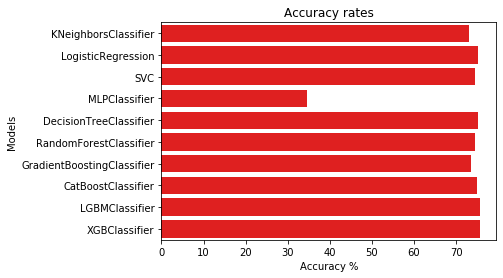

In [376]:
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy rates');

In [358]:
results

,Models,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,36.363636
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,73.593074
0,CatBoostClassifier,74.891775
0,LGBMClassifier,75.757576
0,XGBClassifier,75.757576


# Conclusion: As you see from the table above Logistic regression, LGBM model, decision tree and XGBoost has better accuracy than others for "Diabetes" dataset.

# What else we can do?

1. Variable creation / Variable Engineering
2. Feature selection: If we can have better accuracy with less feature this is better for understanding the data and result.We shoul compare the correlations of variables with each other. If we have variables that have high correlation, we can choose one of them and drop other one.
3. Use automatic ML libraries
4. Model deployment: In order to get the most value out of machine learning models, it is important to seamlessly deploy them into production so a business can start using them to make practical decisions.